In [27]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import image_dataset_from_directory
from model1 import init as init_model_1, compile as compile_model_1
from model2 import init as init_model_2, compile as compile_model_2
import os
from utils import plot_history, load_img_path_from_dir, img_to_array
import numpy as np

In [30]:
dir_train = os.environ.get('TRAIN_PATH')
dir_test = os.environ.get('TEST_PATH')
dir_val = os.environ.get('VAL_PATH')

In [31]:
dataset_train = image_dataset_from_directory(
  dir_train,
  labels = "inferred",
  label_mode = "categorical",
  seed=123,
  image_size=(255,255),
  batch_size=8)

Found 202 files belonging to 2 classes.


In [32]:
dataset_val = image_dataset_from_directory(
    dir_val,
    labels = "inferred",
    label_mode = "categorical",
    seed=123,
    image_size=(255,255),
    batch_size=8
)

Found 389 files belonging to 2 classes.


In [33]:
dataset_test = image_dataset_from_directory(
    dir_test,
    labels = 'inferred',
    label_mode = 'categorical',
    seed=123,
    image_size=(255,255),
    batch_size=8,
)

Found 202 files belonging to 2 classes.


# Model 1

In [51]:
es = EarlyStopping(monitor='val_recall', patience=1, restore_best_weights=True)
model1 = init_model_1()
model1 = compile_model_1(model1)
history1 = model1.fit(dataset_train,validation_data=dataset_val,epochs=20,callbacks=[es])

Epoch 1/20
26/26 [==============================] - 5s 164ms/step - loss: 2.7861 - recall_9: 0.5198 - val_loss: 0.6758 - val_recall_9: 0.7404
Epoch 2/20
26/26 [==============================] - 4s 164ms/step - loss: 0.6937 - recall_9: 0.5000 - val_loss: 0.6916 - val_recall_9: 0.7404
Epoch 3/20
26/26 [==============================] - 4s 156ms/step - loss: 0.6955 - recall_9: 0.4604 - val_loss: 0.6979 - val_recall_9: 0.2596
Epoch 4/20
26/26 [==============================] - 4s 157ms/step - loss: 0.6935 - recall_9: 0.4703 - val_loss: 0.6892 - val_recall_9: 0.7404
Epoch 5/20
26/26 [==============================] - 4s 156ms/step - loss: 0.6942 - recall_9: 0.5000 - val_loss: 0.6865 - val_recall_9: 0.7404
Epoch 6/20
26/26 [==============================] - 4s 158ms/step - loss: 0.6945 - recall_9: 0.5000 - val_loss: 0.6804 - val_recall_9: 0.7404
Epoch 7/20
26/26 [==============================] - 4s 156ms/step - loss: 0.6934 - recall_9: 0.5000 - val_loss: 0.6917 - val_recall_9: 0.7404
Epoch 

(<AxesSubplot:title={'center':'loss'}>,
 <AxesSubplot:title={'center':'Recall_9'}>)

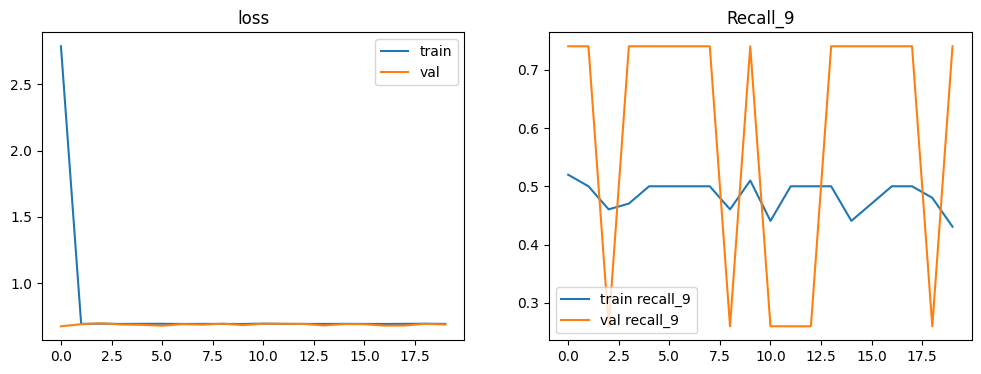

In [52]:
plot_history(history1, metric='recall_9')

In [56]:
img_tests_1 = load_img_path_from_dir(os.environ.get('TEST_PATH')+ '/1')
predictions_1 = []
for img in img_tests_1:
    img = img_to_array(img)
    predictions_1.append(model1.predict(img))

1/1 [==============================] - 0s 12ms/step


In [58]:
for res in predictions_1:
    dog_id = np.argmax(res.max())
    print(dog_id)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


# Model 2

In [48]:
es = EarlyStopping(patience=1,restore_best_weights=True)  # Early Stopping normal para la pérdida
model2 = init_model_2()
model2 = compile_model_2(model2)
history = model2.fit(dataset_train,validation_data=dataset_val,epochs=20,callbacks=[es])

Epoch 1/20
26/26 [==============================] - 28s 1s/step - loss: 10.2391 - recall_8: 0.4901 - val_loss: 0.7001 - val_recall_8: 0.2699
Epoch 2/20
26/26 [==============================] - 28s 1s/step - loss: 0.6809 - recall_8: 0.5396 - val_loss: 0.6870 - val_recall_8: 0.5758
Epoch 3/20
26/26 [==============================] - 29s 1s/step - loss: 0.6526 - recall_8: 0.6386 - val_loss: 0.6327 - val_recall_8: 0.6710
Epoch 4/20
26/26 [==============================] - 28s 1s/step - loss: 0.6307 - recall_8: 0.6782 - val_loss: 0.7702 - val_recall_8: 0.6144


(<AxesSubplot:title={'center':'loss'}>,
 <AxesSubplot:title={'center':'Recall_8'}>)

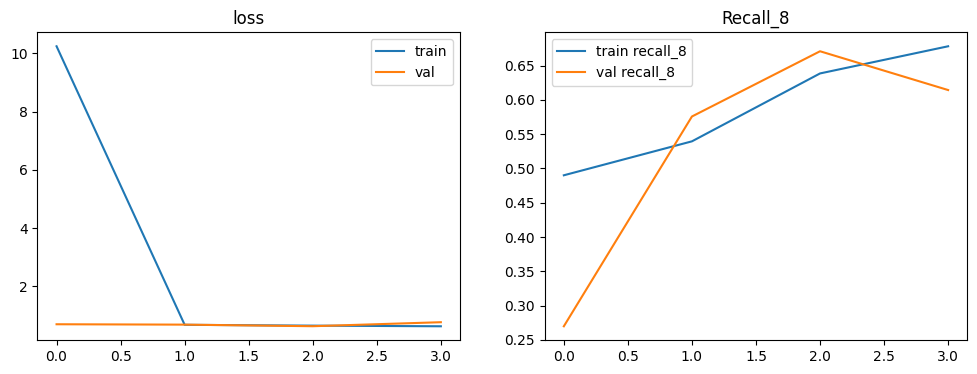

In [53]:
plot_history(history, metric='recall_8')

In [59]:
img_tests_1 = load_img_path_from_dir(os.environ.get('TEST_PATH')+ '/1')
predictions_2 = []
for img in img_tests_1:
    img = img_to_array(img)
    predictions_2.append(model2.predict(img))

1/1 [==============================] - 0s 38ms/step


In [60]:
for res in predictions_2:
    dog_id = np.argmax(res.max())
    print(dog_id)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
